In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/imdb_data.csv")

In [3]:
#Lets check whether the data is load or not. check first 5 rows

In [4]:
df.head()

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [5]:
#basic information about dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3348 non-null   object 
 1   primaryTitle    3348 non-null   object 
 2   originalTitle   3348 non-null   object 
 3   isAdult         3348 non-null   int64  
 4   runtimeMinutes  3348 non-null   int64  
 5   genres          3348 non-null   object 
 6   averageRating   3348 non-null   float64
 7   numVotes        3348 non-null   int64  
 8   budget          3348 non-null   int64  
 9   gross           3297 non-null   float64
 10  release_date    3343 non-null   object 
 11  directors       3348 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 314.0+ KB


- The dataset contain 3348 rows and 12 columns

- There are 6 object data type . 4 integer columns, 2 float columns.

- isAdult column showing int. we need to convert this columns into Yes and No format to analyse the data properly.

- release_date column is an object , which should be converted to date time format or  we seperate the date, year and month for better analysis.

In [7]:
#lets check for the missing values.


In [8]:
df.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,51


- gross (51 missing values )

- gross represent total earning of a movies. missing values may indicate that data was unavailable or the movie is underperformed.

-possible solution - 1 -missing values replace with mean or median

2 - drop rows with missing values - 51 rows will be droped from the dataset

3 - If budget is available . then we estimate the gross using a median.


- missing release dates - incomplete record.
- possible solution rop the rows.

In [9]:
#lets replace the missing values of gross with KNN imputation

In [10]:
from sklearn.impute import KNNImputer

In [11]:
imputer = KNNImputer(n_neighbors=5)

In [12]:
df[['budget', 'gross']] = imputer.fit_transform(df[['budget', 'gross']])

In [13]:
df.isnull().sum()

,0
id,0
primaryTitle,0
originalTitle,0
isAdult,0
runtimeMinutes,0
genres,0
averageRating,0
numVotes,0
budget,0
gross,0


In [14]:
#drop release date rows

In [15]:
df = df.dropna(subset=['release_date'])

In [16]:
df.shape

(3343, 12)

- After successfully removing the null values we have clean dataset.

- total 3343 rows and 12 columns.

- so lets start to do EDA

In [17]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'isAdult', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'budget', 'gross',
       'release_date', 'directors'],
      dtype='object')

In [18]:
#lets find out  How many unique movies are in the dataset?

In [19]:
df['id'].nunique()

3343

so we have 3343 unique movies. so that mean we dont have any duplicated values in the dataset.

In [20]:
#lets check the overall distribution of movie runtime.

Text(0.5, 1.0, 'Distribution of Movie Runtime')

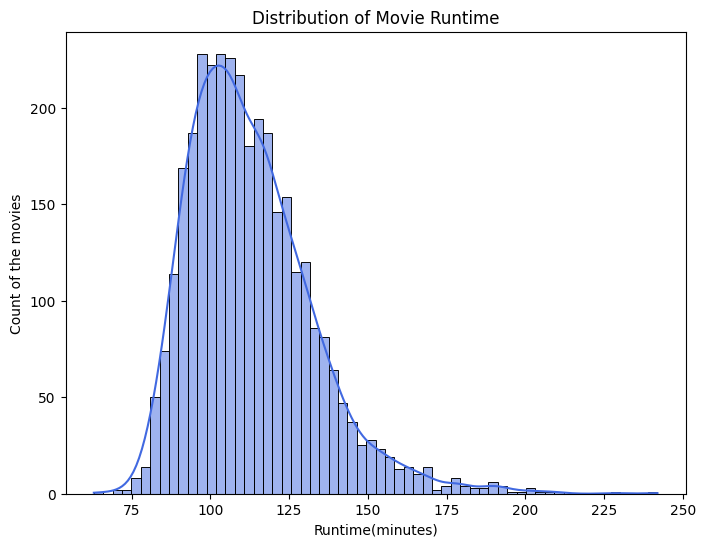

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(df['runtimeMinutes'], bins=60, kde=True, color='royalblue')
plt.xlabel("Runtime(minutes)")
plt.ylabel("Count of the movies")
plt.title("Distribution of Movie Runtime")

In [22]:
#as we see the distribution. it seems like normal distribution. but lets check for the outliers also

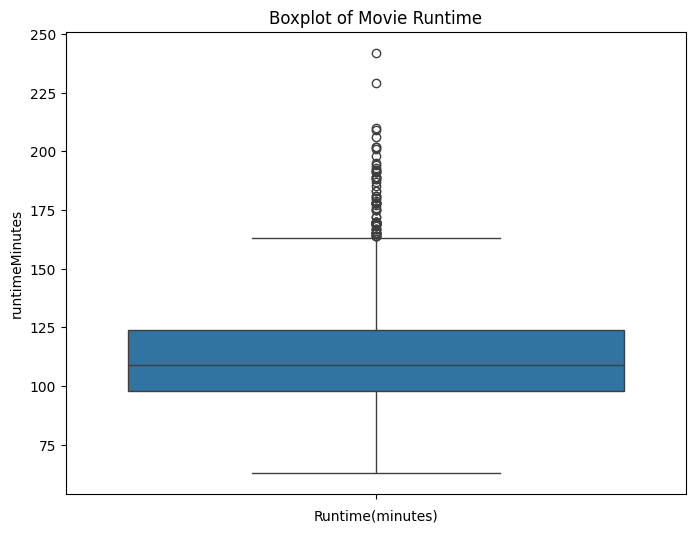

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(df['runtimeMinutes'])
plt.xlabel("Runtime(minutes)")
plt.title("Boxplot of Movie Runtime")
plt.savefig("Runtime.png", dpi=300)

In [24]:
#lets check How many movies are marked as "Adult" (isAdult=1) vs. non-adult (isAdult=0)?

In [25]:
df['isAdult'].unique()

array([0])

- as weseen we have only one category in adult section.

- that mean all movies is only for Adult

- so for better analysis we drop the adult column

In [26]:
df.drop(columns=['isAdult'], inplace=True)

In [27]:
#What are the top 10 most common movie genres?

In [28]:
df.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold


In [29]:
genres_list = df['genres'].str.split(",").explode()

In [30]:
genres_list

,genres
0,Comedy
0,Fantasy
0,Romance
1,Adventure
1,Animation
...,...
3346,Adventure
3346,Horror
3347,Comedy
3347,Crime


In [31]:
genres_counts = genres_list.value_counts().head(10)

In [32]:
genres_counts

,count
genres,
Drama,1542
Comedy,1176
Action,1171
Adventure,894
Crime,652
Thriller,632
Romance,441
Horror,402
Mystery,376


<ipython-input-33-4d1000c1601d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_counts.index, y=genres_counts.values, palette='viridis')


Text(0, 0.5, 'Number of movies')

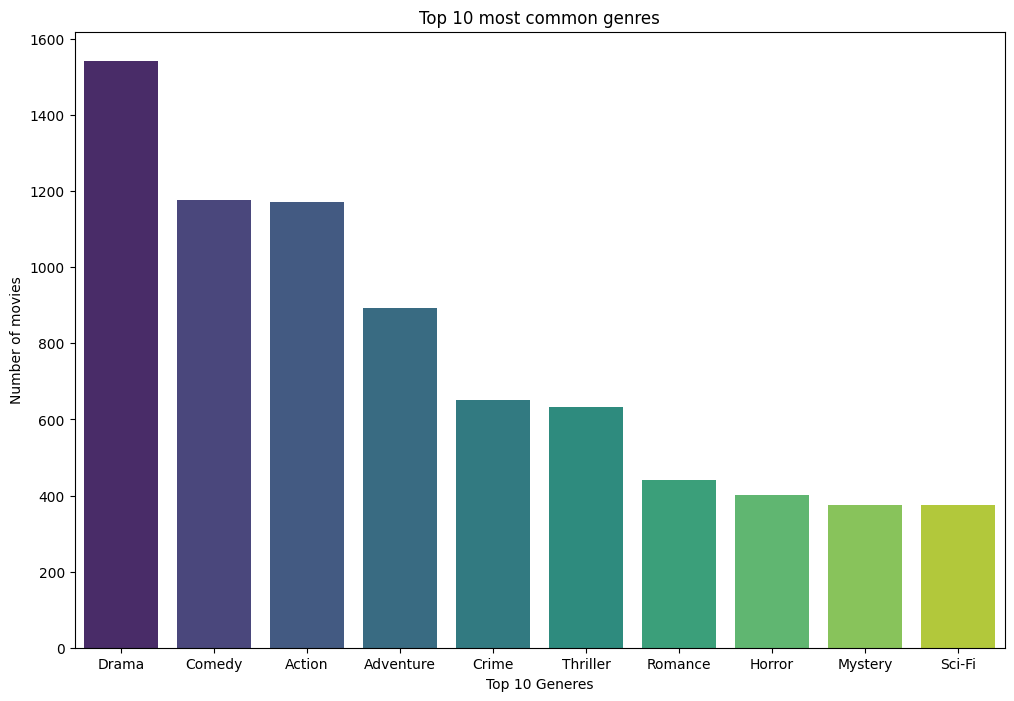

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x=genres_counts.index, y=genres_counts.values, palette='viridis')
plt.title("Top 10 most common genres")
plt.xlabel("Top 10 Generes")
plt.ylabel("Number of movies")

- Drama is the most dminant genre with 1542 movies

-comedy and action are almost eqal ~ 1170

- Adventure , crime and thriller are strong contenders -

-romance , horror, mystery an si-fi are mid tier genres.

In [34]:
#What is the distribution of averageRating? Are ratings skewed toward high or low values?

In [35]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'budget', 'gross', 'release_date',
       'directors'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Average Rating')

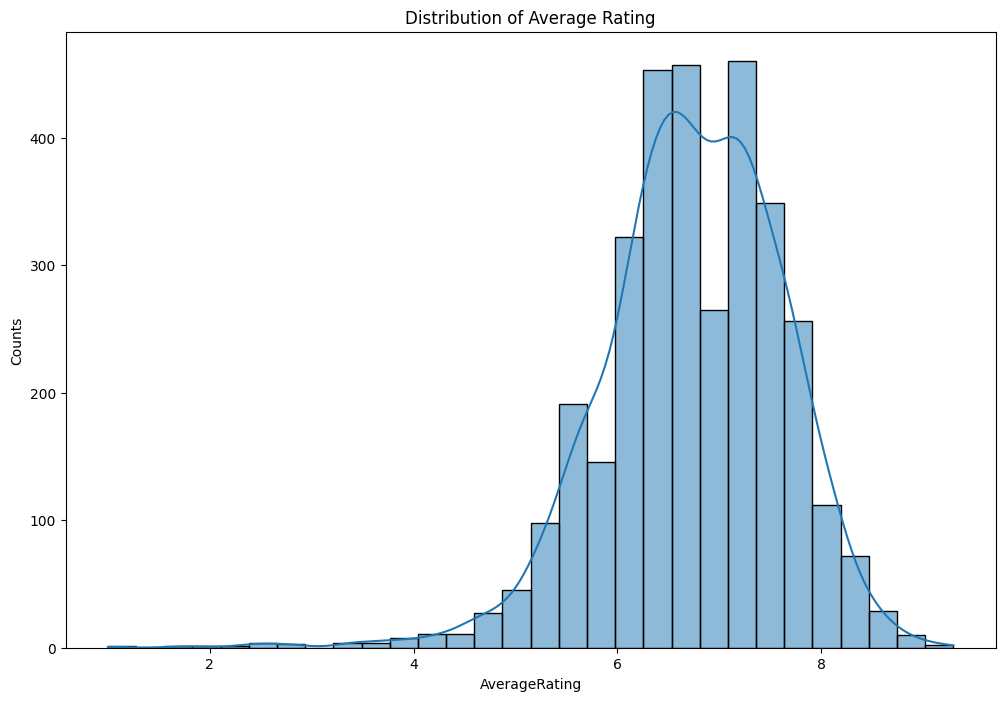

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(df['averageRating'], bins = 30, kde=True)
plt.xlabel("AverageRating")
plt.ylabel("Counts")
plt.title("Distribution of Average Rating")

In [37]:
#lets see how many movies are very low and very high rated

Text(0.5, 1.0, 'Boxplot of average rating')

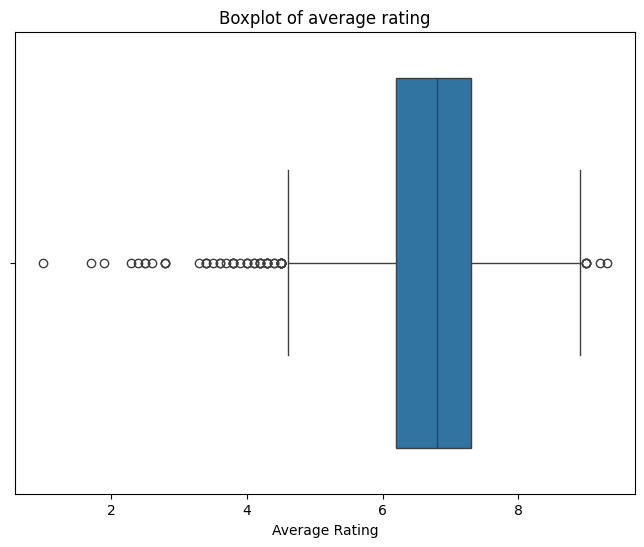

In [38]:
plt.figure(figsize=(8,6))
sns.boxplot(x= df['averageRating'])
plt.xlabel("Average Rating")
plt.title("Boxplot of average rating")

- Most movies are well rated

- The majority of rating are above 6  to 8 indicating positive bias in user reviews.

-some movies are high rated movies. looks like outliers.

-there are fewer low rated movies, looks outlier, meaning people dontbother to rate them. low rated movies. - prabalely disliked by audiences.

In [39]:
#How many movies have received over 100,000 votes (numVotes > 100,000)?

In [40]:
high_vote_movies = df[df['numVotes']>100000]

In [41]:
high_vote_movies.shape

(2099, 11)

Text(0.5, 1.0, 'Distribution of movies votes')

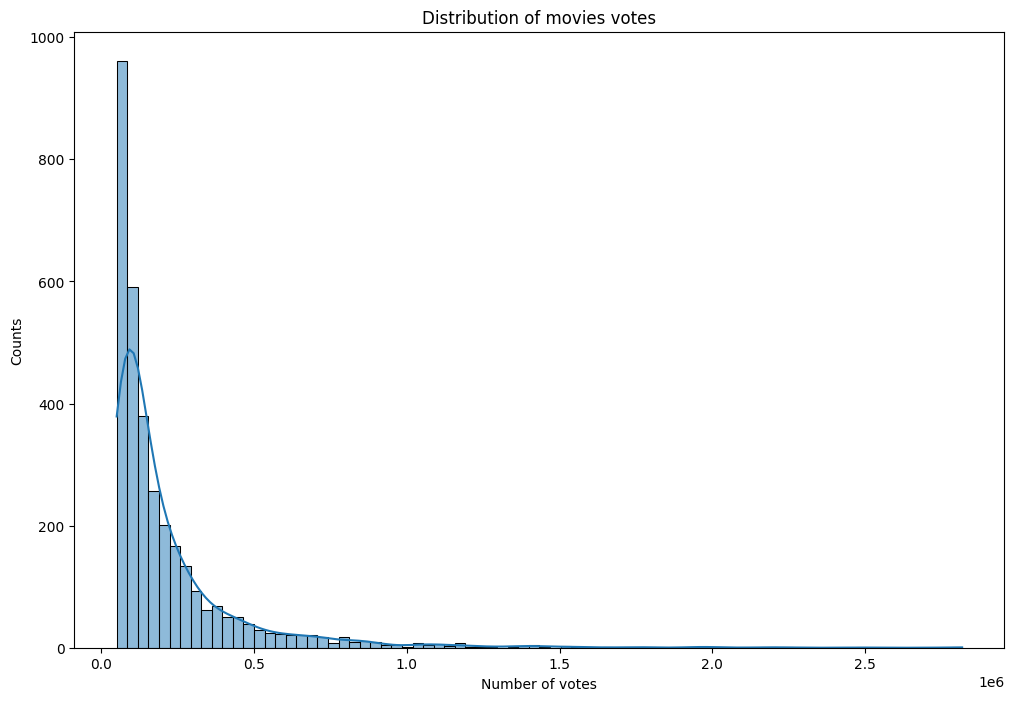

In [42]:
plt.figure(figsize=(12,8))
sns.histplot(df['numVotes'], bins = 80, kde= True)
plt.xlabel("Number of votes")
plt.ylabel("Counts")
plt.title("Distribution of movies votes")

In [43]:
#7. What is the distribution of movie budgets?

Text(0.5, 1.0, 'Distribution of Movies Budget')

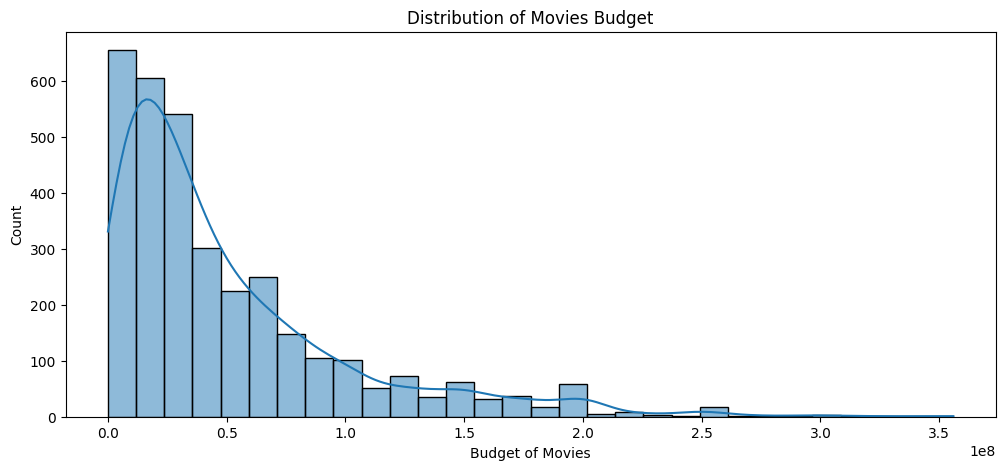

In [44]:
plt.figure(figsize=(12,5))
sns.histplot(df['budget'], bins = 30, kde=True)
plt.xlabel("Budget of Movies")
plt.ylabel("Count")
plt.title("Distribution of Movies Budget")

- the budget distriution id right skewed

- many movies had low budget movies

- few movies only had high budgets

Text(0.5, 1.0, 'Boxplot of Movies Budget')

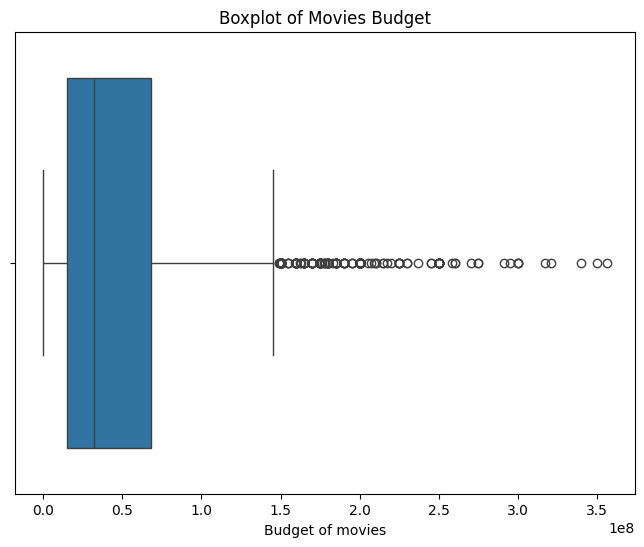

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(x= df['budget'])
plt.xlabel("Budget of movies")
plt.title("Boxplot of Movies Budget")

In [46]:
#. What is the distribution of gross revenue?

In [47]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'budget', 'gross', 'release_date',
       'directors'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Movies Gross Revenue')

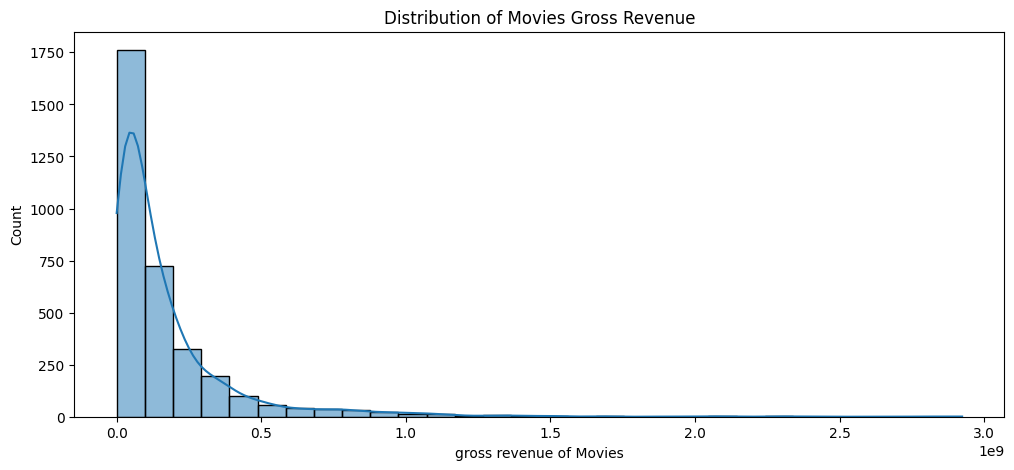

In [48]:
plt.figure(figsize=(12,5))
sns.histplot(df['gross'], bins = 30, kde=True)
plt.xlabel("gross revenue of Movies")
plt.ylabel("Count")
plt.title("Distribution of Movies Gross Revenue")

Text(0.5, 1.0, 'Boxplot of Movies gross revenue')

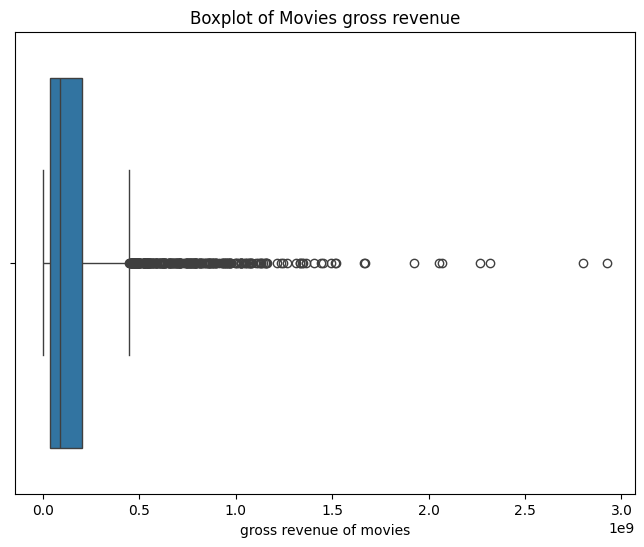

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x= df['gross'])
plt.xlabel("gross revenue of movies")
plt.title("Boxplot of Movies gross revenue")

- gross revenue distribution is right skewed

- a few blockbuster movies earning massive amount

- there outliers movies with extream earnings.

In [50]:
#What is the average budget and gross revenue of movies?

In [51]:
avg_budget = df['budget'].mean()

In [52]:
avg_gross = df['gross'].mean()

In [53]:
avg_budget

np.float64(50425817.86299731)

In [54]:
avg_gross

np.float64(167729001.37349686)

<ipython-input-55-e3e0ed8b6028>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['avg_budget', 'avg_gross'],


Text(0.5, 1.0, 'Comparision of average budget vs. gross')

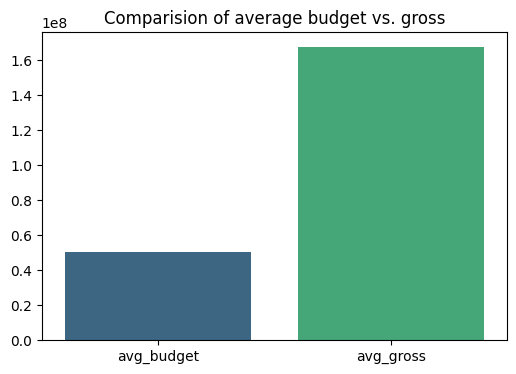

In [55]:
plt.figure(figsize=(6,4))
sns.barplot(x=['avg_budget', 'avg_gross'],
            y = [avg_budget, avg_gross], palette='viridis')
plt.title("Comparision of average budget vs. gross")

- average gross exceed the average budget, indicating overall profitability

In [56]:
#. Is there a significant correlation between budget and gross revenue?

In [57]:
correlatio_matrix = df[["budget", "gross"]].corr()

In [58]:
correlatio_matrix

,budget,gross
budget,1.000000,0.699016
gross,0.699016,1.000000


Text(0.5, 1.0, 'Correlation betw. budget and gross revenue')

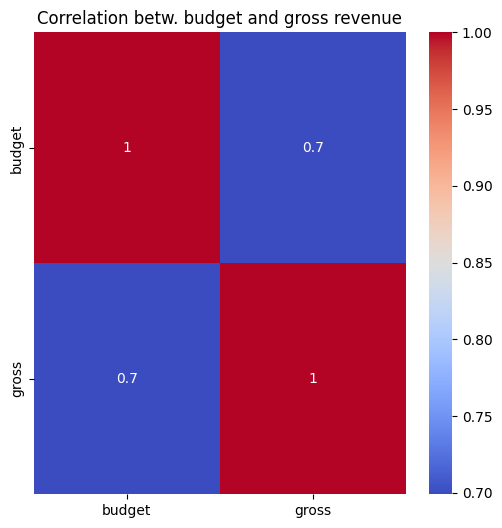

In [59]:
plt.figure(figsize=(6,6))
sns.heatmap(correlatio_matrix,annot=True, cmap="coolwarm" )
plt.title("Correlation betw. budget and gross revenue")

- strong positive correlation ~ 0.699 between budget and gross revenue.

- this means higher budget movies tends to greater higher revenue.

In [60]:
# Do high-budget movies tend to have higher ratings?

In [61]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'runtimeMinutes', 'genres',
       'averageRating', 'numVotes', 'budget', 'gross', 'release_date',
       'directors'],
      dtype='object')

In [62]:
correlatio_matrix = df[["budget", "averageRating"]].corr()

In [63]:
correlatio_matrix

,budget,averageRating
budget,1.000000,-0.079107
averageRating,-0.079107,1.000000


Text(0.5, 1.0, 'Correlation betw. budget and average rating')

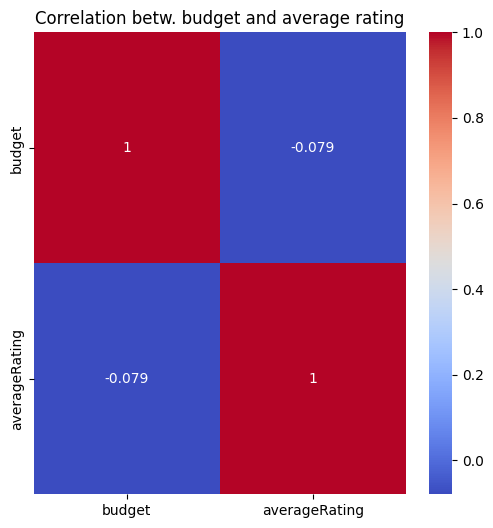

In [64]:
plt.figure(figsize=(6,6))
sns.heatmap(correlatio_matrix,annot=True, cmap="coolwarm" )
plt.title("Correlation betw. budget and average rating")

- weak negative correlation ~ -0.079

- suggest almost no relationship between budget and average rating


In [65]:
#Which are the top 10 highest-grossing movies?

In [66]:
top_grossing = df[["primaryTitle","gross"]].sort_values(by='gross', ascending= False).head(10)

In [67]:
top_grossing

,primaryTitle,gross
1762,Avatar,2.923706e+09
3055,Avengers: Endgame,2.799439e+09
2514,Avatar: The Way of Water,2.320250e+09
726,Titanic,2.264743e+09
2850,Star Wars: Episode VII - The Force Awakens,2.071310e+09
3054,Avengers: Infinity War,2.052415e+09
2051,Spider-Man: No Way Home,1.921847e+09
1368,Jurassic World,1.671537e+09
3201,The Lion King,1.663075e+09
1859,The Avengers,1.520539e+09


<ipython-input-68-2c416fba6c9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_grossing["gross"], y =top_grossing['primaryTitle'], palette="viridis")


Text(0.5, 1.0, 'Top 10 Highest grossing movies')

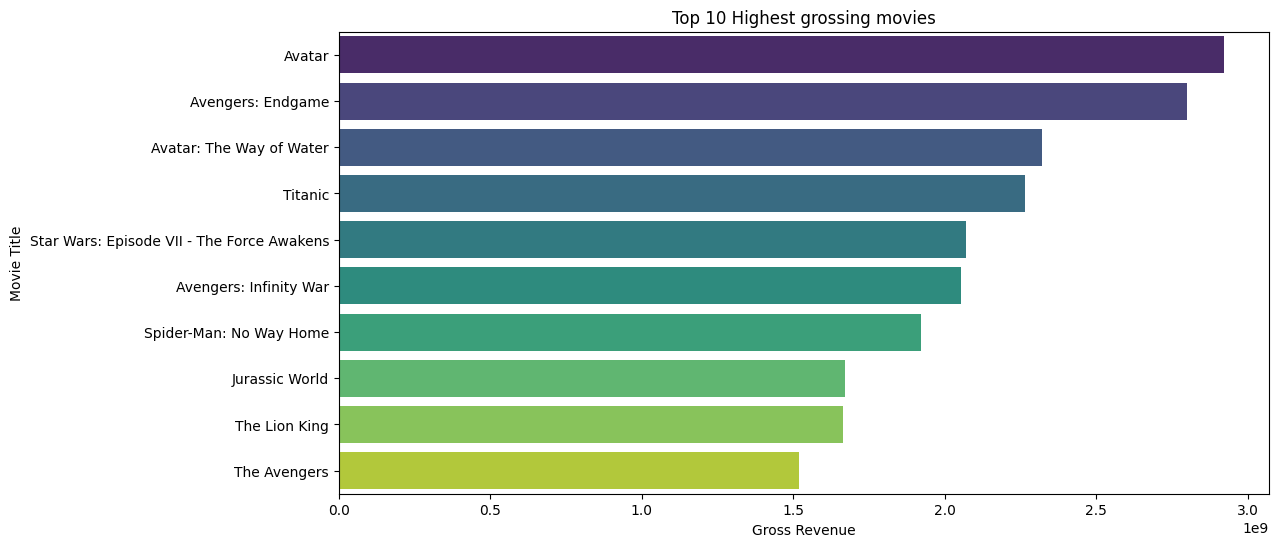

In [68]:
plt.figure(figsize=(12,6))
sns.barplot(x= top_grossing["gross"], y =top_grossing['primaryTitle'], palette="viridis")
plt.xlabel("Gross Revenue")
plt.ylabel("Movie Title")
plt.title("Top 10 Highest grossing movies")


In [69]:
#Which are the top 10 most profitable movies (profit = gross - budget)?

In [70]:
df['profit'] = df['gross'] - df['budget']

In [71]:
top_profitable = df.sort_values(by ='profit', ascending= False).head(10)

In [72]:
top_profitable

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
1762,tt0499549,Avatar,Avatar,162,"Action,Adventure,Fantasy",7.9,1364568,237000000.0,2.923706e+09,"December 10, 2009",James Cameron,2.686706e+09
3055,tt4154796,Avengers: Endgame,Avengers: Endgame,181,"Action,Adventure,Drama",8.4,1224453,356000000.0,2.799439e+09,"April 18, 2019","Anthony Russo, Joe Russo",2.443439e+09
726,tt0120338,Titanic,Titanic,194,"Drama,Romance",7.9,1252486,200000000.0,2.264743e+09,"November 1, 1997",James Cameron,2.064743e+09
2514,tt1630029,Avatar: The Way of Water,Avatar: The Way of Water,192,"Action,Adventure,Fantasy",7.6,466743,350000000.0,2.320250e+09,"December 6, 2022",James Cameron,1.970250e+09
2850,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,138,"Action,Adventure,Sci-Fi",7.8,960165,245000000.0,2.071310e+09,"December 14, 2015",J.J. Abrams,1.826310e+09
3054,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149,"Action,Adventure,Sci-Fi",8.4,1164767,321000000.0,2.052415e+09,"April 23, 2018","Anthony Russo, Joe Russo",1.731415e+09
2051,tt10872600,Spider-Man: No Way Home,Spider-Man: No Way Home,148,"Action,Adventure,Fantasy",8.2,841498,200000000.0,1.921847e+09,"December 13, 2021",Jon Watts,1.721847e+09
1368,tt0369610,Jurassic World,Jurassic World,124,"Action,Adventure,Sci-Fi",6.9,668305,150000000.0,1.671537e+09,"May 29, 2015",Colin Trevorrow,1.521537e+09
3201,tt6105098,The Lion King,The Lion King,118,"Adventure,Animation,Drama",6.8,260956,260000000.0,1.663075e+09,"July 9, 2019",Jon Favreau,1.403075e+09
2427,tt1517268,Barbie,Barbie,114,"Adventure,Comedy,Fantasy",7.0,376979,100000000.0,1.441660e+09,"July 9, 2023",Greta Gerwig,1.341660e+09


<ipython-input-73-43c39d51a041>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_profitable["profit"], y =top_profitable['primaryTitle'], palette="viridis")


Text(0.5, 1.0, 'Top 10 Highest profitable movies')

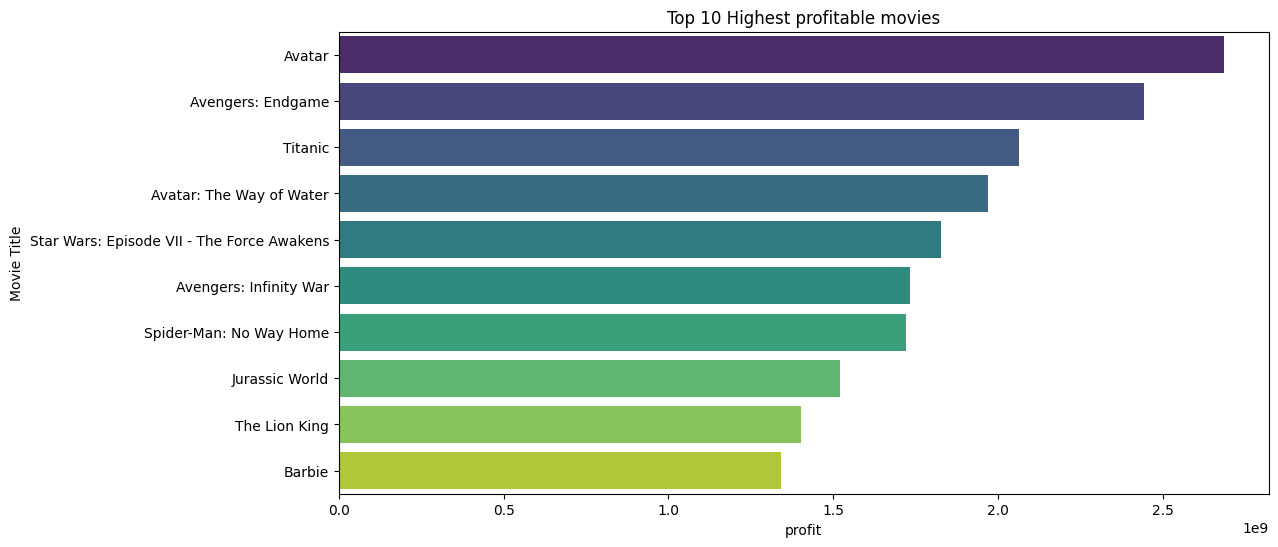

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(x= top_profitable["profit"], y =top_profitable['primaryTitle'], palette="viridis")
plt.xlabel("profit")
plt.ylabel("Movie Title")
plt.title("Top 10 Highest profitable movies")


In [74]:
#14. Are movies with a higher number of votes (numVotes) more profitable?

In [75]:
correlatio_matrix = df[["numVotes", "profit"]].corr()

In [76]:
correlatio_matrix

,numVotes,profit
numVotes,1.000000,0.528258
profit,0.528258,1.000000


Text(0.5, 1.0, 'Correlation betw. numVotes and Profit')

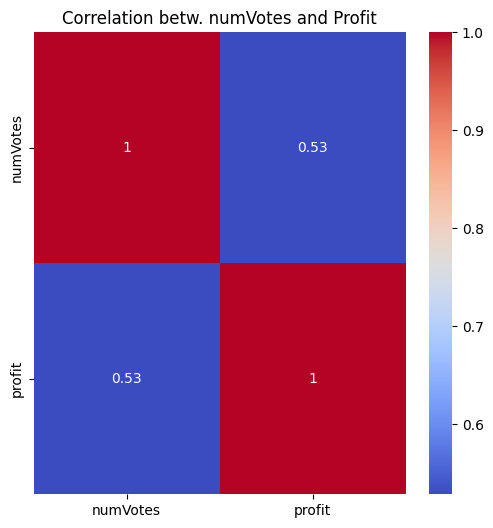

In [77]:
plt.figure(figsize=(6,6))
sns.heatmap(correlatio_matrix,annot=True, cmap="coolwarm" )
plt.title("Correlation betw. numVotes and Profit")

- The correlation bet. number of votes and profit is 0.53 which indicates a moderate positive correlation.


In [78]:
# 15 Which genre has the highest number of movies? (same as 4rth qu )

- The genre with the highest number of movies is Drama, with 1542 movies.

In [79]:
#16 What are the average budget and gross revenue per genre?

In [80]:
df.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0


In [81]:
new_df = df.copy()

In [82]:
new_df['genres'] = new_df['genres'].str.split(",")

In [83]:
new_df = new_df.explode("genres")

In [84]:
new_df

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
0,tt0035423,Kate & Leopold,Kate & Leopold,118,Comedy,6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0
0,tt0035423,Kate & Leopold,Kate & Leopold,118,Fantasy,6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0
0,tt0035423,Kate & Leopold,Kate & Leopold,118,Romance,6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0
1,tt0065421,The Aristocats,The AristoCats,78,Adventure,7.1,111758,4000000.0,35459543.0,"December 11, 1970",Wolfgang Reitherman,31459543.0
1,tt0065421,The Aristocats,The AristoCats,78,Animation,7.1,111758,4000000.0,35459543.0,"December 11, 1970",Wolfgang Reitherman,31459543.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,88,Adventure,5.7,56955,15000000.0,65774490.0,"July 1, 2021",Adam Robitel,50774490.0
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,88,Horror,5.7,56955,15000000.0,65774490.0,"July 1, 2021",Adam Robitel,50774490.0
3347,tt9893250,I Care a Lot,I Care a Lot,118,Comedy,6.4,141433,14000000.0,1351662.0,"September 12, 2020",J Blakeson,-12648338.0
3347,tt9893250,I Care a Lot,I Care a Lot,118,Crime,6.4,141433,14000000.0,1351662.0,"September 12, 2020",J Blakeson,-12648338.0


In [85]:
avg_rev_gross = new_df.groupby("genres")[["budget", "gross"]].mean().sort_values(by="gross", ascending= False)

In [86]:
avg_rev_gross = avg_rev_gross.head(10)

In [87]:
avg_rev_gross

,budget,gross
genres,,
Animation,9.261869e+07,3.718782e+08
Adventure,9.342321e+07,3.240299e+08
Family,7.331553e+07,2.584685e+08
Sci-Fi,7.823706e+07,2.486523e+08
Fantasy,7.262359e+07,2.438574e+08
Action,7.749185e+07,2.354541e+08
Comedy,4.518031e+07,1.572124e+08
Musical,3.950357e+07,1.494457e+08
Thriller,4.132095e+07,1.345612e+08


Text(0.5, 1.0, 'Average budget & gross per genre')

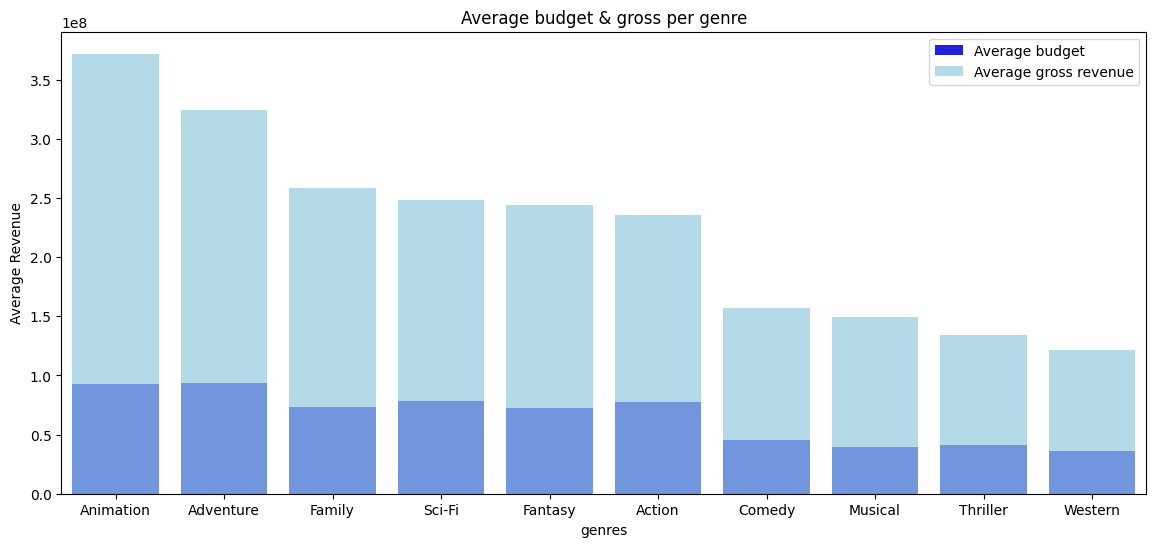

In [88]:
plt.figure(figsize=(14,6))
sns.barplot(data = avg_rev_gross , x = "genres", y='budget', color = 'blue', label = "Average budget")
sns.barplot(data = avg_rev_gross , x = "genres", y='gross', color = 'skyblue', alpha = 0.7, label ="Average gross revenue")
plt.ylabel("Average Revenue")
plt.title("Average budget & gross per genre")

In [89]:
#Which genre has the highest average rating?

In [90]:
genre_avg_rating = new_df.groupby("genres")["averageRating"].mean().reset_index()

In [91]:
genre_avg_rating

,genres,averageRating
0,Action,6.559180
1,Adventure,6.650112
2,Animation,7.107576
3,Biography,7.301299
4,Comedy,6.580357
5,Crime,6.846012
6,Documentary,7.053846
7,Drama,7.054086
8,Family,6.566480
9,Fantasy,6.485928


In [92]:
top_genre_rating = genre_avg_rating.sort_values(by="averageRating", ascending= False).head(5)

In [93]:
top_genre_rating

,genres,averageRating
20,War,7.438776
15,News,7.400000
3,Biography,7.301299
10,History,7.233333
21,Western,7.216667


<ipython-input-94-2dd911884f06>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_genre_rating, x= "genres", y = "averageRating", palette="viridis")


Text(0.5, 1.0, 'Average Rating per genres')

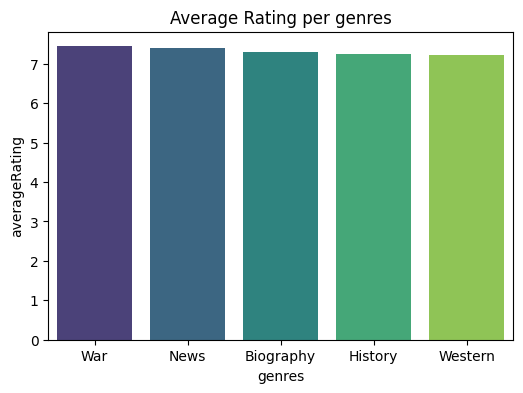

In [94]:
plt.figure(figsize=(6,4))
sns.barplot(data = top_genre_rating, x= "genres", y = "averageRating", palette="viridis")
plt.title("Average Rating per genres")

- War movies have the highest average rating ~ 7.44 , indicating that audiences generally rate them highly , possibly due to strong storytelling and emotional depth

In [95]:
# Are there genres that tend to have longer runtimes?

In [96]:
new_df.head(1)

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
0,tt0035423,Kate & Leopold,Kate & Leopold,118,Comedy,6.4,87925,48000000.0,76019048.0,"December 11, 2001",James Mangold,28019048.0


In [97]:
genre_runtime = new_df.groupby("genres")["runtimeMinutes"].mean().reset_index()

In [98]:
genre_runtime

,genres,runtimeMinutes
0,Action,115.755764
1,Adventure,114.086130
2,Animation,94.621212
3,Biography,126.324675
4,Comedy,103.983844
5,Crime,114.711656
6,Documentary,101.307692
7,Drama,119.234112
8,Family,105.960894
9,Fantasy,114.086826


In [99]:
top_genre_runtime = genre_runtime.sort_values(by ="runtimeMinutes", ascending= False).head(5)

In [100]:
top_genre_runtime

,genres,runtimeMinutes
10,History,136.494624
20,War,129.938776
3,Biography,126.324675
21,Western,123.500000
13,Musical,123.357143


<ipython-input-101-c15036c1e99c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_genre_runtime, x= "genres", y = "runtimeMinutes", palette="viridis")


Text(0.5, 1.0, 'Average runtimeMinutes per genres')

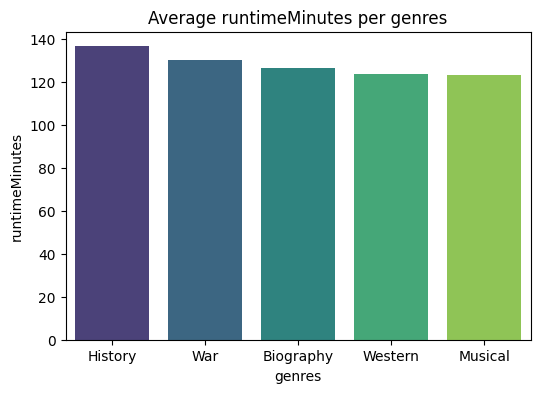

In [101]:
plt.figure(figsize=(6,4))
sns.barplot(data = top_genre_runtime, x= "genres", y = "runtimeMinutes", palette="viridis")
plt.title("Average runtimeMinutes per genres")

- History movies have highest average runtime ~ 136 minutes, likely due to their detailed storytelling.

- War films ~ 129 minutes also tend to be long.

In [102]:
#Are movies with a higher number of votes (numVotes) more profitable?

In [103]:
#What is the correlation between numVotes and averageRating?

In [104]:
correlatio_matrix = df[["numVotes","averageRating"]].corr()

In [105]:
correlatio_matrix

,numVotes,averageRating
numVotes,1.000000,0.484569
averageRating,0.484569,1.000000


In [106]:
#scatter plot with regression line

Text(0.5, 1.0, 'Correlation between number of votes and average rating')

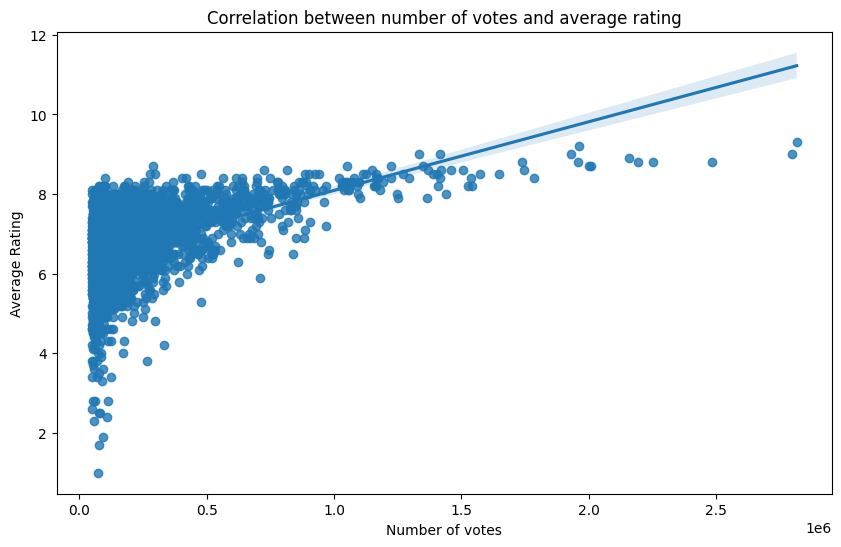

In [107]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x="numVotes", y="averageRating")
plt.xlabel("Number of votes")
plt.ylabel("Average Rating")
plt.title("Correlation between number of votes and average rating")

<Axes: >

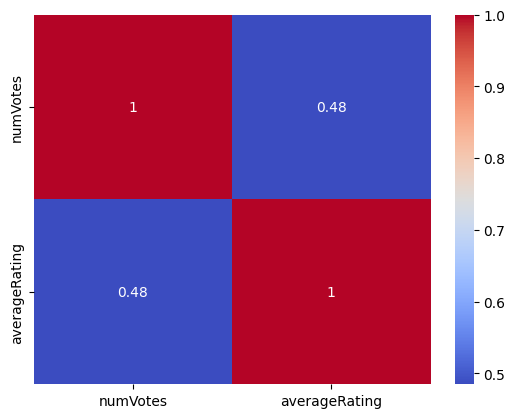

In [109]:
sns.heatmap(correlatio_matrix, annot= True, cmap="coolwarm")

- The correlation of 0.48 suggest that moderate positive correlation,  that mean the movies with higher votes tend to have higher rating.

- movies generally get good rating there are more.

In [123]:
# What are the top 10 highest-rated movies?

In [112]:
top_rated_movies = df.sort_values(by="averageRating", ascending= False).head(10)

In [113]:
top_rated_movies

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
529,tt0111161,The Shawshank Redemption,The Shawshank Redemption,142,Drama,9.3,2817283,25000000.0,2.888472e+07,"September 10, 1994",Frank Darabont,3.884716e+06
17,tt0068646,The Godfather,The Godfather,175,"Crime,Drama",9.2,1963432,6000000.0,2.503418e+08,"March 14, 1972",Francis Ford Coppola,2.443418e+08
488,tt0108052,Schindler's List,Schindler's List,195,"Biography,Drama,History",9.0,1416181,22000000.0,3.221612e+08,"November 30, 1993",Steven Spielberg,3.001612e+08
1691,tt0468569,The Dark Knight,The Dark Knight,152,"Action,Crime,Drama",9.0,2798830,185000000.0,1.007337e+09,"July 14, 2008",Christopher Nolan,8.223369e+08
908,tt0167260,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,201,"Action,Adventure,Drama",9.0,1929275,94000000.0,1.155595e+09,"December 1, 2003",Peter Jackson,1.061595e+09
38,tt0071562,The Godfather Part II,The Godfather Part II,202,"Crime,Drama",9.0,1333027,13000000.0,4.796192e+07,"December 12, 1974",Francis Ford Coppola,3.496192e+07
523,tt0110912,Pulp Fiction,Pulp Fiction,154,"Crime,Drama",8.9,2160463,8000000.0,2.139288e+08,"May 21, 1994",Quentin Tarantino,2.059288e+08
759,tt0120737,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,178,"Action,Adventure,Drama",8.8,1956438,93000000.0,8.985237e+08,"December 10, 2001",Peter Jackson,8.055237e+08
508,tt0109830,Forrest Gump,Forrest Gump,142,"Drama,Romance",8.8,2194012,55000000.0,6.782265e+08,"June 23, 1994",Robert Zemeckis,6.232265e+08
2323,tt1375666,Inception,Inception,148,"Action,Adventure,Sci-Fi",8.8,2484142,160000000.0,8.390306e+08,"July 8, 2010",Christopher Nolan,6.790306e+08


<ipython-input-122-dccf03753451>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_rated_movies , x= "averageRating", y="originalTitle", palette= "rocket")


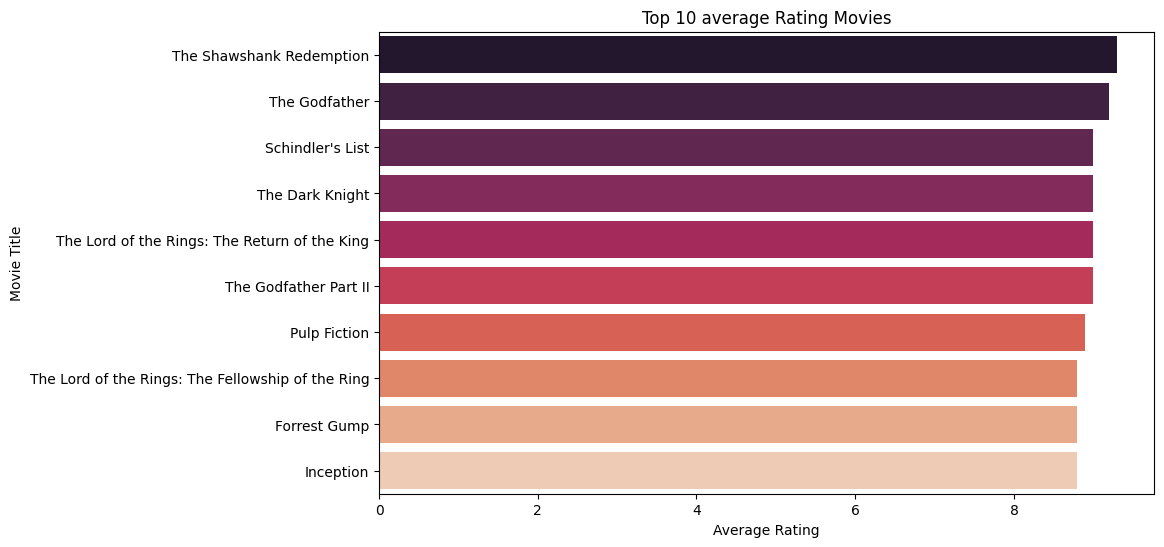

In [122]:
plt.figure(figsize=(10,6))
sns.barplot(data = top_rated_movies , x= "averageRating", y="originalTitle", palette= "rocket")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.title("Top 10 average Rating Movies")
plt.savefig("Top_10_highest_movies.jpeg",dpi = 300)

In [126]:
lowest_rated_movies = df.sort_values(by="averageRating", ascending= False).tail(10)

In [128]:
lowest_rated_movies

,id,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors,profit
3180,tt5697572,Cats,Cats,110,"Comedy,Drama,Family",2.8,54638,95000000.0,75558925.0,"December 16, 2019",Tom Hooper,-19441075.0
1685,tt0466342,Date Movie,Date Movie,83,"Comedy,Romance",2.8,61566,20000000.0,85749034.0,"February 17, 2006","Aaron Seltzer, Jason Friedberg",65749034.0
1175,tt0299930,Gigli,Gigli,121,"Comedy,Crime,Romance",2.6,50335,54000000.0,7266209.0,"July 27, 2003",Martin Brest,-46733791.0
2060,tt1098327,Dragonball Evolution,Dragonball Evolution,85,"Action,Adventure,Fantasy",2.5,78236,30000000.0,55720772.0,"March 10, 2009",James Wong,25720772.0
944,tt0185183,Battlefield Earth,Battlefield Earth,117,"Action,Adventure,Sci-Fi",2.5,82348,73000000.0,29725663.0,"May 10, 2000",Roger Christian,-43274337.0
1801,tt0799949,Epic Movie,Epic Movie,86,"Adventure,Comedy,Fantasy",2.4,108506,20000000.0,87238158.0,"January 1, 2007","Jason Friedberg, Aaron Seltzer",67238158.0
1333,tt0362165,Son of the Mask,Son of the Mask,94,"Comedy,Family,Fantasy",2.3,58583,84000000.0,59981548.0,"February 11, 2005",Lawrence Guterman,-24018452.0
2180,tt1213644,Disaster Movie,Disaster Movie,87,"Comedy,Sci-Fi",1.9,93840,20000000.0,34816824.0,"August 29, 2008","Jason Friedberg, Aaron Seltzer",14816824.0
2562,tt1702443,Justin Bieber: Never Say Never,Justin Bieber: Never Say Never,105,"Documentary,Music",1.7,76394,13000000.0,99036827.0,"February 9, 2011",Jon M. Chu,86036827.0
3197,tt5988370,Reis,Reis,108,"Biography,Drama",1.0,73940,8000000.0,538551.0,"March 2, 2017",Hüdaverdi Yavuz,-7461449.0


In [129]:
lowest_rated_movies = df.sort_values(by="averageRating").head(10)

<ipython-input-131-d749f4c4415f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = lowest_rated_movies, x= "averageRating", y="originalTitle", palette= "rocket")


Text(0.5, 1.0, 'Lowest average Rating Movies')

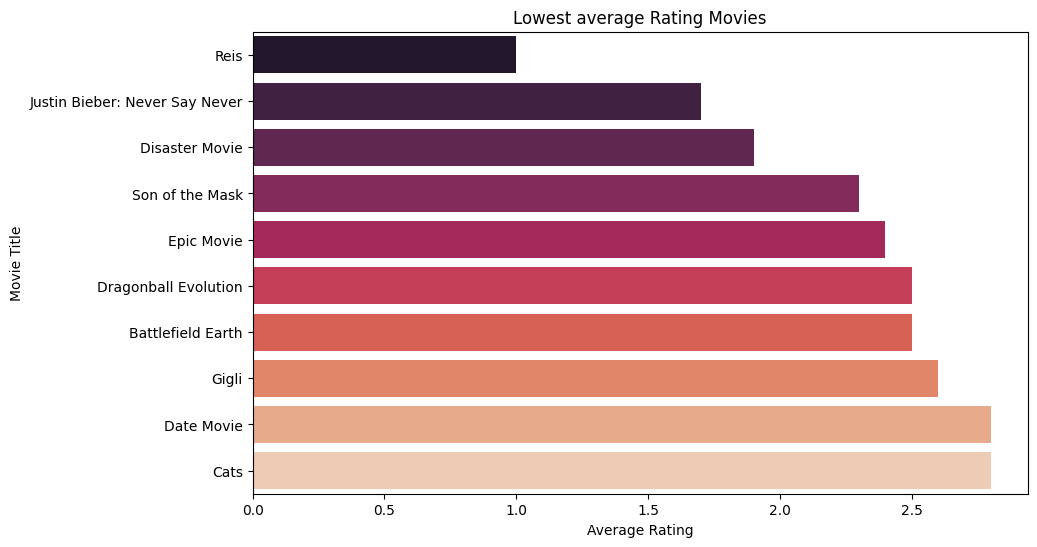

In [131]:
plt.figure(figsize=(10,6))
sns.barplot(data = lowest_rated_movies, x= "averageRating", y="originalTitle", palette= "rocket")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.title("Lowest average Rating Movies")


In [132]:
#Do longer movies tend to have higher ratings?

In [135]:
correlatio_matrix = df[['runtimeMinutes', 'averageRating']].corr()

In [136]:
correlatio_matrix

,runtimeMinutes,averageRating
runtimeMinutes,1.00000,0.36004
averageRating,0.36004,1.00000


<Axes: >

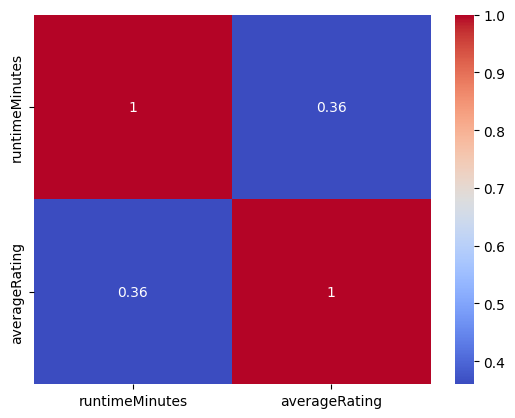

In [137]:
sns.heatmap(correlatio_matrix, annot=True, cmap='coolwarm')

- The correaltion coeff. is 0.36 suggest a moderate positive relationship between runtime and rating.

- This means longer movies tend to have higher rating, but the effect is not very strong.